# Jorge Leonardo López Agredo
## cod: 2218061 
### Métodos numéricos. Prof: DIEGO RUEDA

# Consideremos el problema de difusión cruzada 

\begin{gather*}
  \begin{cases}
u_t-(k_1(x)u_{x})_x+\chi (uv_x)_x=\alpha u\left(1-\dfrac{u}{K}\right), \\
v_t-(k_2(x)v_{x})_x=ru-sv,\\
u(0)=u_0>0,\ \ v(0)=v_0>0.
\cr
u(a)=u(b)=0, v(a)=v(b)=0
\end{cases}  
\end{gather*}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import scipy.stats as ss
import time
%matplotlib inline


In [115]:
def PicardQuimiotaxis(M,N):
    a= 0
    b= 5
    L= b-a# longitud de la barra (m)
    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    x1 = np.arange(a+h/2,b, h)
    eps = 0.01 #tolerancia método iterativo
    t = 0
    T = 5
    dt = 0.005# Paso en el tiempo---
    #dt = (T-t)/N
    # datos estacionarios
    k1 = lambda x : 0.61*x+1 #difusividad térmica (m^2/s)
    k2 = lambda x : 0.2*x+1 #difusividad térmica (m^2/s)
    chi = lambda x : 0.3*x-1 
    alpha = lambda x : 0.*x+1 
    r = 0.3
    s = -0.4
    #chi = 1
    K=10 #capacidad de carga 

    #condición inicial y de frontera
    Uinic = lambda x : 0.01*(x*(L-x))
    #Uinic = lambda x : x**2*(L-x)**2+4
    Ua= lambda t : 0*t+0
    Ub= lambda t : 0*t+0
    U=Uinic(x)
    Uamp = np.zeros(m+1)
    Uamp[0] = Ua(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = Ub(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U

    #condición inicial y de frontera
    Vinic = lambda x : 0.01*(x**2*(L-x)**2)
    Va= lambda t : 0*t+0
    Vb= lambda t : 0*t+0
    V=Vinic(x)
    Vamp = np.zeros(m+1)
    Vamp[0] = Va(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[-1] = Vb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[1:-1] = V
    fig = plt.figure(figsize = (18, 6))
    f1 = fig.add_subplot(121)
    f1.plot(Xamp,Uamp, label = 'CI for  u')

    #time.sleep(0.5)
    f2 = fig.add_subplot(122)
    f2.plot(Xamp,Vamp, label = 'CI for  v')

    for k in range(1, N+1):
        tol = 1
        U0 = Uamp.copy()
        V0 = Vamp.copy()
        #entro al método iterativo de Newton, punto fijo
        while(tol > eps):
            #montaje de la matriz evolutiva primero resolvemos para v
            Avleft = -k2(x1)[1:-1]*dt/h**2
            Avdiag = 1+ (k2(x1)[:-1]+k2(x1)[1:])*dt/h**2+s*dt
            Av = diags([Avleft,Avdiag, Avleft],[-1,0,1]).toarray()
            Bv = Vamp[1:-1]+dt*r*U0[1:-1]
            V =np.dot(np.linalg.inv(Av),Bv)#solución del sistema lineal
            
            Vaux = np.zeros_like(Xamp)
            Vaux[0] = Va(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[-1] = Vb(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[1:-1] = V
            
            #calculemos ahora a u
            Auleft = -k1(x1)[1:-1]*dt/h**2 - dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Audiag = 1+  (k1(x1)[1:]+k1(x1)[:-1])*dt/h**2-alpha(x)* dt*(1-U0[1:-1]/K)+ chi(x)*(Vaux[2:]-2*Vaux[1:-1]+Vaux[:-2])*dt/h**2
            Auright = -k1(x1)[1:-1]*dt/h**2 + dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Au = diags([Auleft,Audiag, Auright],[-1,0,1]).toarray()
            Bu = Uamp[1:-1]
            #print(Au)
            U = np.dot(np.linalg.inv(Au),Bu)#solución del sistema lineal
            



            #calculo del error relativo
            Ures = U-U0[1:-1]
            Vres = V-V0[1:-1]
            Ures2 = Ures**2
            Vres2 = Vres**2
            U2 = U**2
            V2 = V**2
            tol1 = np.sqrt(h*np.sum(Ures2))/np.sqrt(h*np.sum(U2))
            tol2 = np.sqrt(h*np.sum(Vres2))/np.sqrt(h*np.sum(V2))
            tol = max(tol1, tol2)
            #print(tol)
            U0[1:-1] = U.copy()
            V0[1:-1] = V.copy()
            #tol=0.00001

        #time.sleep(1)
        #actualizamos el paso en tiempo
        Uamp = np.zeros_like(Xamp)
        Uamp[0] = Ua(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[-1] = Ub(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[1:-1] = U
        Vamp = np.zeros_like(Xamp)
        Vamp[0] = Va(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[-1] = Vb(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[1:-1] = V
        f1.plot(Xamp,Uamp)
        #time.sleep(0.5)
        f2.plot(Xamp,Vamp)
    plt.legend()
    plt.show()



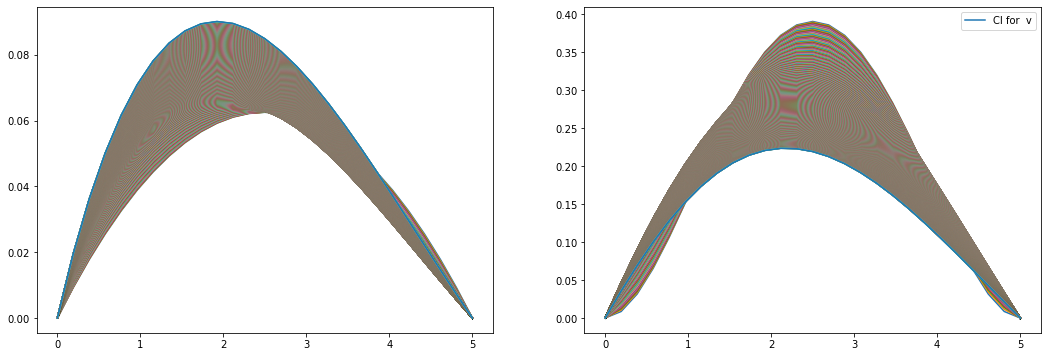

In [116]:
PicardQuimiotaxis(25,1000)

In [19]:
def PicardQuimiotaxis(M,N):
    a= 0
    b= 5
    L= b-a# longitud de la barra (m)
    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    x1 = np.arange(a+h/2,b, h)
    eps = 0.01 #tolerancia método iterativo
    t = 0
    T = 5
    dt = 0.005# Paso en el tiempo---
    #dt = (T-t)/N
    # datos estacionarios
    k1 = lambda x : 0.61*x+0.1 #difusividad térmica (m^2/s)
    k2 = lambda x : 0.2*x+0.1 #difusividad térmica (m^2/s)
    chi = lambda x : 0.*x-1 
    alpha = lambda x : 0.*x+1 
    r = 0.3
    s = -0.4
    #chi = 1
    K=10 #capacidad de carga 

    #condición inicial y de frontera
    #Uinic = lambda x : 0.01*(x*(L-x)+4)
    #Uinic = lambda x : x**2*(L-x)**2+4
    Xu = ss.norm(3.5,0.40)
    Yu = ss.norm(2.1,0.725)
    Uinic = Xu.pdf(x)+Yu.pdf(x)
    
    Ua= lambda t : 0*t+0
    Ub= lambda t : 0*t+0
    U=Uinic
    Uamp = np.zeros(m+1)
    Uamp[0] = Ua(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = Ub(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U

    #condición inicial y de frontera
    #Vinic = lambda x : 0.01*(x**2*(L-x)**2+4)
    Xv = ss.norm(2.5,0.270)
    Yv = ss.norm(1.25,0.10)
    Vinic = Xv.pdf(x)+Yv.pdf(x)
    Va= lambda t : 0*t+0
    Vb= lambda t : 0*t+0
    V=Vinic
    Vamp = np.zeros(m+1)
    Vamp[0] = Va(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[-1] = Vb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[1:-1] = V
    fig = plt.figure(figsize = (18, 6))
    f1 = fig.add_subplot(121)
    f1.plot(Xamp,Uamp, label = 'CI for  u')

    #time.sleep(0.5)
    f2 = fig.add_subplot(122)
    f2.plot(Xamp,Vamp, label = 'CI for  v')

    for k in range(1, N+1):
        tol = 1
        U0 = Uamp.copy()
        V0 = Vamp.copy()
        #entro al método iterativo de Newton, punto fijo
        while(tol > eps):
            #montaje de la matriz evolutiva primero resolvemos para v
            Avleft = -k2(x1)[1:-1]*dt/h**2
            Avdiag = 1+ (k2(x1)[:-1]+k2(x1)[1:])*dt/h**2+s*dt
            Av = diags([Avleft,Avdiag, Avleft],[-1,0,1]).toarray()
            Bv = Vamp[1:-1]+dt*r*U0[1:-1]
            V =np.dot(np.linalg.inv(Av),Bv)#solución del sistema lineal
            
            Vaux = np.zeros_like(Xamp)
            Vaux[0] = Va(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[-1] = Vb(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[1:-1] = V
            
            #calculemos ahora a u
            Auleft = -k1(x1)[1:-1]*dt/h**2 - dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Audiag = 1+  (k1(x1)[1:]+k1(x1)[:-1])*dt/h**2-alpha(x)* dt*(1-U0[1:-1]/K)+ chi(x)*(Vaux[2:]-2*Vaux[1:-1]+Vaux[:-2])*dt/h**2
            Auright = -k1(x1)[1:-1]*dt/h**2 + dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Au = diags([Auleft,Audiag, Auright],[-1,0,1]).toarray()
            Bu = Uamp[1:-1]
            #print(Au)
            U = np.dot(np.linalg.inv(Au),Bu)#solución del sistema lineal
            



            #calculo del error relativo
            Ures = U-U0[1:-1]
            Vres = V-V0[1:-1]
            Ures2 = Ures**2
            Vres2 = Vres**2
            U2 = U**2
            V2 = V**2
            tol1 = np.sqrt(h*np.sum(Ures2))/np.sqrt(h*np.sum(U2))
            tol2 = np.sqrt(h*np.sum(Vres2))/np.sqrt(h*np.sum(V2))
            tol = max(tol1, tol2)
            #print(tol)
            U0[1:-1] = U.copy()
            V0[1:-1] = V.copy()
            #tol=0.00001

        #time.sleep(1)
        #actualizamos el paso en tiempo
        Uamp = np.zeros_like(Xamp)
        Uamp[0] = Ua(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[-1] = Ub(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[1:-1] = U
        Vamp = np.zeros_like(Xamp)
        Vamp[0] = Va(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[-1] = Vb(k*dt)# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[1:-1] = V
    f1.plot(Xamp,Uamp)
        #time.sleep(0.5)
    f2.plot(Xamp,Vamp)
    plt.legend()
    plt.show()

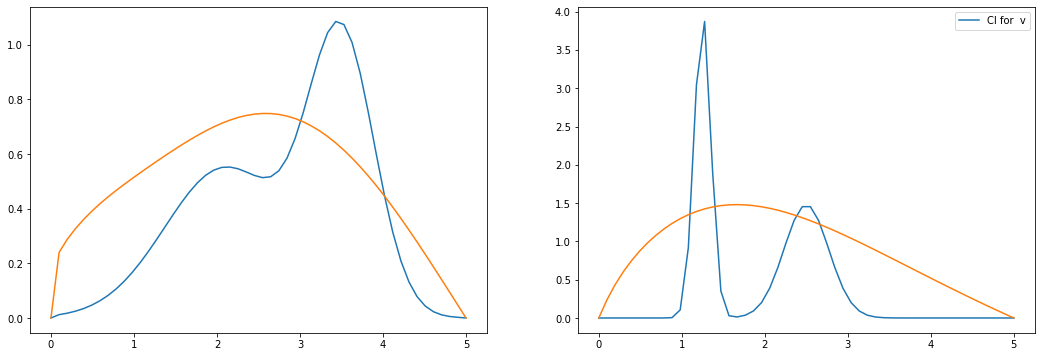

In [34]:
PicardQuimiotaxis(50,300)

# Consideremos el problema de difusión cruzada con condiciones Neumann homogéneas


\begin{gather*}
  \begin{cases}
u_t-(k_1(x)u_{x})_x+\chi (uv_x)_x=\alpha u\left(1-\dfrac{u}{K}\right), \\
v_t-(k_2(x)v_{x})_x=ru-sv,\\
u(0)=u_0>0,\ \ v(0)=v_0>0.
\cr
u_x(a)=u_x(b)=0, v_x(a)=v_x(b)=0
\end{cases}  
\end{gather*}

In [57]:
def PicardQuimiotaxisNeumannH(M,N):
    a= 0
    b= 5
    L= b-a# longitud de la barra (m)
    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    x1 = np.arange(a+h/2,b, h)
    eps = 0.01 #tolerancia método iterativo
    t = 0
    T = 5
    dt = 0.005# Paso en el tiempo---
    #dt = (T-t)/N
    # datos estacionarios
    k1 = lambda x : 0.61*x+0.1 #difusividad térmica (m^2/s)
    k2 = lambda x : 0.2*x+0.1 #difusividad térmica (m^2/s)
    chi = lambda x : 0.*x-1 
    alpha = lambda x : 0.*x+1 
    r = 0.3
    s = -0.4
    #chi = 1
    K=10 #capacidad de carga 

    #condición inicial y de frontera
    #Uinic = lambda x : 0.01*(x*(L-x)+4)
    #Uinic = lambda x : x**2*(L-x)**2+4
    Xu = ss.norm(3.5,0.40)
    Yu = ss.norm(2.1,0.725)
    Uinic = Xu.pdf(x)+Yu.pdf(x)
    
    Ua= lambda t : 0*t+0
    Ub= lambda t : 0*t+0
    U=Uinic
    Uamp = np.zeros(m+1)
    Uamp[0] = Ua(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[-1] = Ub(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Uamp[1:-1] = U

    #condición inicial y de frontera
    #Vinic = lambda x : 0.01*(x**2*(L-x)**2+4)
    Xv = ss.norm(2.5,0.270)
    Yv = ss.norm(1.25,0.10)
    Vinic = Xv.pdf(x)+Yv.pdf(x)
    Va= lambda t : 0*t+0
    Vb= lambda t : 0*t+0
    V=Vinic
    Vamp = np.zeros(m+1)
    Vamp[0] = Va(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[-1] = Vb(0)# Condiciones variables en la frontera, dependiendo del tiempo
    Vamp[1:-1] = V
    fig = plt.figure(figsize = (18, 6))
    f1 = fig.add_subplot(121)
    f1.plot(Xamp,Uamp, label = 'CI for  u')

    #time.sleep(0.5)
    f2 = fig.add_subplot(122)
    f2.plot(Xamp,Vamp, label = 'CI for  v')

    for k in range(1, N+1):
        tol = 1
        U0 = Uamp.copy()
        V0 = Vamp.copy()
        #entro al método iterativo de Newton, punto fijo
        while(tol > eps):
            #montaje de la matriz evolutiva primero resolvemos para v
            Avleft = -k2(x1)[1:-1]*dt/h**2
            Avdiag = 1+ (k2(x1)[:-1]+k2(x1)[1:])*dt/h**2+s*dt
            Av = diags([Avleft,Avdiag, Avleft],[-1,0,1]).toarray()
            Av[0,0] = 1+ k2(x1)[1]*dt/h**2+s*dt
            Av[-1,-1] =1+ k2(x1)[-2]*dt/h**2+s*dt
            Bv = Vamp[1:-1]+dt*r*U0[1:-1]
            V =np.dot(np.linalg.inv(Av),Bv)#solución del sistema lineal
            
            Vaux = np.zeros_like(Xamp)
            Vaux[0] = V[0]# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[-1] = V[-1]# Condiciones variables en la frontera, dependiendo del tiempo
            Vaux[1:-1] = V
            
            #calculemos ahora a u
            Auleft = -k1(x1)[1:-1]*dt/h**2 - dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Audiag = 1+  (k1(x1)[1:]+k1(x1)[:-1])*dt/h**2-alpha(x)* dt*(1-U0[1:-1]/K)+ chi(x)*(Vaux[2:]-2*Vaux[1:-1]+Vaux[:-2])*dt/h**2
            Auright = -k1(x1)[1:-1]*dt/h**2 + dt*chi(x)[:-1]*(Vaux[2:-1]-Vaux[1:-2])/(2*h**2)
            Au = diags([Auleft,Audiag, Auright],[-1,0,1]).toarray()
            Au[0,0] = 1+  k1(x1)[1]*dt/h**2-alpha(x)[0]* dt*(1-U0[1]/K)+ chi(x)[0]*(Vaux[2]-32*Vaux[1]+2*Vaux[0])*dt/h**2
            Au[-1,-1] = 1+  k1(x1)[-2]*dt/h**2-alpha(x)[-1]* dt*(1-U0[-1]/K)+ chi(x)[-1]*(2*Vaux[-1]-3*Vaux[-2]+Vaux[-3])*dt/h**2
            Bu = Uamp[1:-1]
            #print(Au)
            U = np.dot(np.linalg.inv(Au),Bu)#solución del sistema lineal
            



            #calculo del error relativo
            Ures = U-U0[1:-1]
            Vres = V-V0[1:-1]
            Ures2 = Ures**2
            Vres2 = Vres**2
            U2 = U**2
            V2 = V**2
            tol1 = np.sqrt(h*np.sum(Ures2))/np.sqrt(h*np.sum(U2))
            tol2 = np.sqrt(h*np.sum(Vres2))/np.sqrt(h*np.sum(V2))
            tol = max(tol1, tol2)
            #print(tol)
            U0[1:-1] = U.copy()
            V0[1:-1] = V.copy()
            #tol=0.00001

        #time.sleep(1)
        #actualizamos el paso en tiempo
        Uamp = np.zeros_like(Xamp)
        Uamp[0] = U[0]# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[-1] = U[-1]# Condiciones variables en la frontera, dependiendo del tiempo
        Uamp[1:-1] = U
        Vamp = np.zeros_like(Xamp)
        Vamp[0] = V[0]# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[-1] = V[-1]# Condiciones variables en la frontera, dependiendo del tiempo
        Vamp[1:-1] = V
    f1.plot(Xamp,Uamp)
        #time.sleep(0.5)
    f2.plot(Xamp,Vamp)
    plt.legend()
    plt.show()

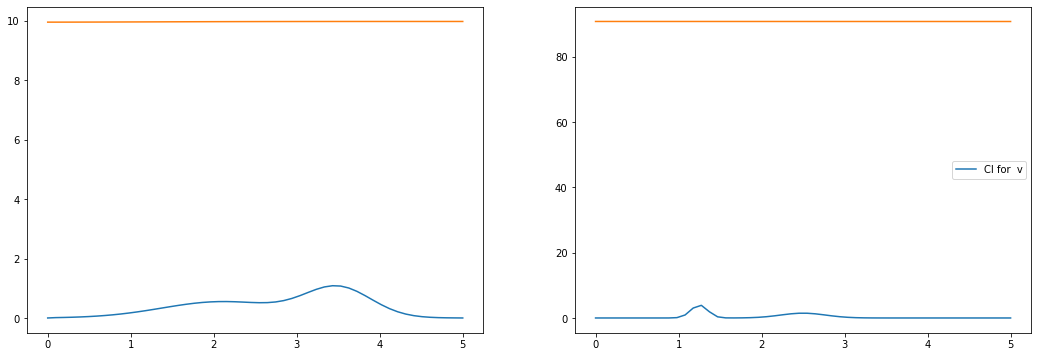

In [82]:
PicardQuimiotaxisNeumannH(50,1700)